# 🔮 ARIMA Model Analysis

Dieses Notebook zeigt die Analyse und Visualisierung des ARIMA-Modells auf GW2-Preisdaten.

**Inhalt:**
1. Daten laden und visualisieren
2. Train/Test Split
3. ARIMA Modell trainieren
4. Forecast vs. Actual
5. Residuen-Analyse
6. Modellvergleich


In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from darts.metrics import mape, rmse, mae, smape

from gw2ml.data import load_gw2_series
from gw2ml.modeling import ARIMAModel

# Plot Style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12

# Farben
COLORS = {
    'train': '#2ecc71',
    'test': '#3498db',
    'forecast': '#e74c3c',
    'residual': '#9b59b6'
}


## 1. 📥 Daten laden


In [4]:
# Konfiguration
# ITEM_ID = 19697  # Copper Ore
ITEM_ID = 19976 # Mystic Coin
DAYS_BACK = 3   # 14 Tage Daten
TRAIN_RATIO = 0.8

# Daten laden
data = load_gw2_series(ITEM_ID, days_back=DAYS_BACK, value_column='sell_unit_price', fill_missing_dates=False)
print(data.info())


GW2Series(Mystic Coin)
  Item ID: 19976
  Period: 2025-12-26 17:20 to 2025-12-29 17:15
  Days: 3.0
  Data points: 864
  Value column: sell_unit_price


/tmp/ipykernel_50499/1753378110.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


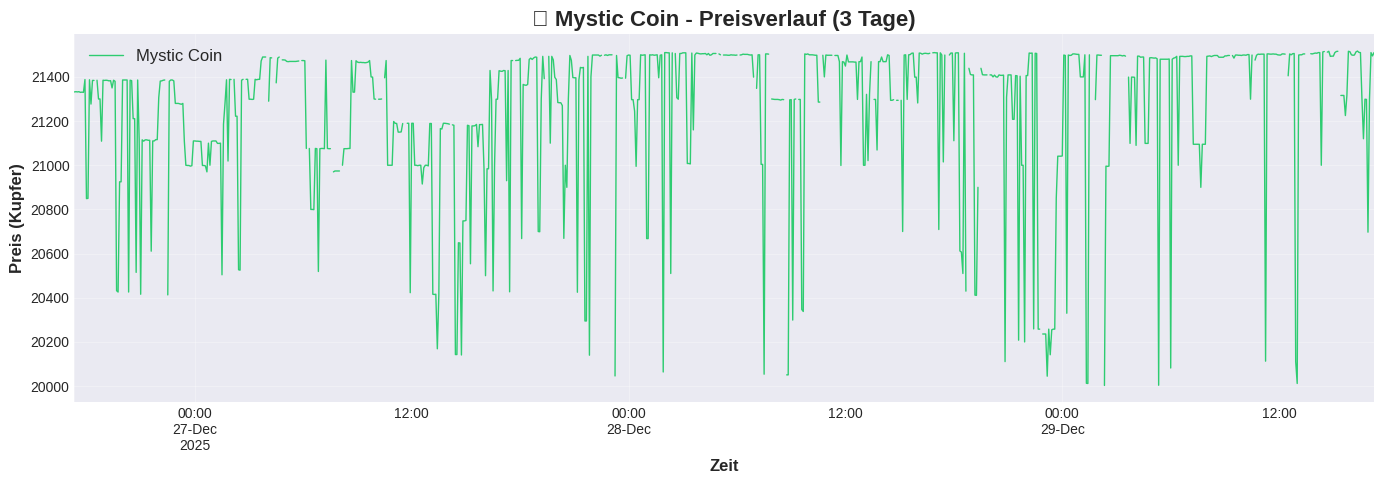

In [5]:
# Plot: Komplette Zeitreihe
fig, ax = plt.subplots(figsize=(14, 5))

data.series.plot(ax=ax, label=data.item_name, color=COLORS['train'], linewidth=1)

ax.set_title(f'📈 {data.item_name} - Preisverlauf ({DAYS_BACK} Tage)', fontsize=16, fontweight='bold')
ax.set_xlabel('Zeit')
ax.set_ylabel('Preis (Kupfer)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 2. ✂️ Train/Test Split


In [6]:
# Split
train, test = data.split(train=TRAIN_RATIO)

print(f"Train: {len(train)} Datenpunkte ({len(train)/288:.1f} Tage)")
print(f"Test:  {len(test)} Datenpunkte ({len(test)/288:.1f} Tage)")


Train: 691 Datenpunkte (2.4 Tage)
Test:  173 Datenpunkte (0.6 Tage)


/tmp/ipykernel_50499/806936766.py:17: UserWarning: Glyph 9986 (\N{BLACK SCISSORS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_50499/806936766.py:17: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9986 (\N{BLACK SCISSORS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9986 (\N{BLACK SCISSORS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

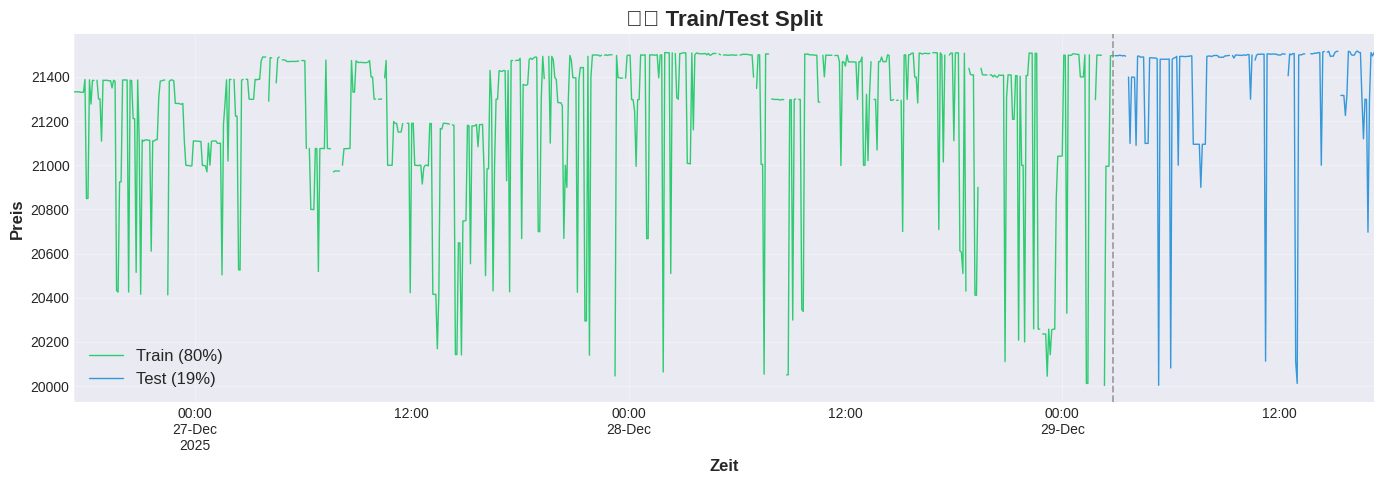

In [7]:
# Plot: Train/Test Split
fig, ax = plt.subplots(figsize=(14, 5))

train.plot(ax=ax, label=f'Train ({int(TRAIN_RATIO*100)}%)', color=COLORS['train'], linewidth=1)
test.plot(ax=ax, label=f'Test ({int((1-TRAIN_RATIO)*100)}%)', color=COLORS['test'], linewidth=1)

ax.set_title('✂️ Train/Test Split', fontsize=16, fontweight='bold')
ax.set_xlabel('Zeit')
ax.set_ylabel('Preis')
ax.legend()
ax.grid(True, alpha=0.3)

# Vertikale Linie am Split-Punkt
split_time = train.end_time()
ax.axvline(x=split_time, color='gray', linestyle='--', alpha=0.7, label='Split')

plt.tight_layout()
plt.show()


## 3. 🎓 ARIMA Modell trainieren


In [8]:
# ARIMA Modell
model = ARIMAModel(p=1, d=1, q=1)
print(f"Modell: {model}")

# Training
print("\n🎓 Training...")
model.fit(train)
print("✅ Training abgeschlossen!")

# Forecast erstellen
forecast = model.predict(n=len(test))
print(f"\nForecast: {len(forecast)} Datenpunkte")


Modell: ARIMA(1,1,1)

🎓 Training...
✅ Training abgeschlossen!

Forecast: 173 Datenpunkte


## 4. 📊 Forecast vs. Actual


/tmp/ipykernel_50499/1130693470.py:20: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


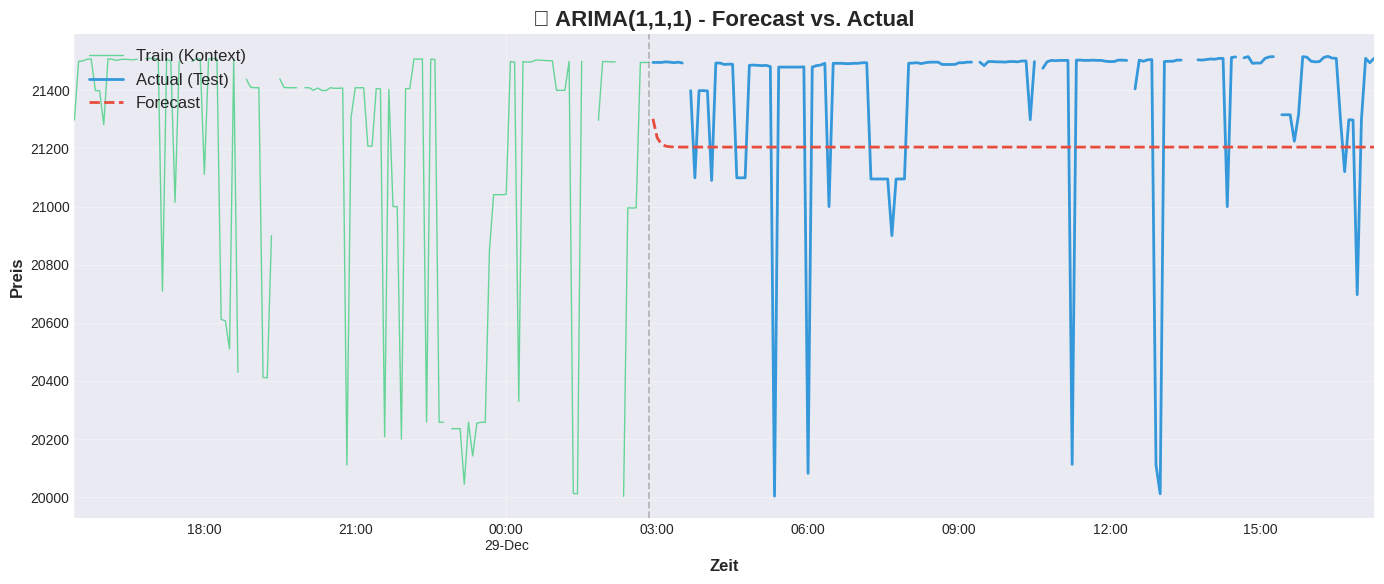

In [9]:
# Plot: Forecast vs Actual
fig, ax = plt.subplots(figsize=(14, 6))

# Nur die letzten 20% Train als Kontext
train_context = train[-int(len(train)*0.2):]
train_context.plot(ax=ax, label='Train (Kontext)', color=COLORS['train'], linewidth=1, alpha=0.7)

test.plot(ax=ax, label='Actual (Test)', color=COLORS['test'], linewidth=2)
forecast.plot(ax=ax, label='Forecast', color=COLORS['forecast'], linewidth=2, linestyle='--')

ax.set_title(f'🔮 {model} - Forecast vs. Actual', fontsize=16, fontweight='bold')
ax.set_xlabel('Zeit')
ax.set_ylabel('Preis')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# Split-Linie
ax.axvline(x=train.end_time(), color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [10]:
# Metriken berechnen
metrics = {
    'MAPE': mape(test, forecast),
    'RMSE': rmse(test, forecast),
    'MAE': mae(test, forecast),
    'SMAPE': smape(test, forecast)
}

print("📊 Performance Metriken:")
print("=" * 30)
for name, value in metrics.items():
    if 'APE' in name:
        print(f"{name:>8}: {value:>8.2f}%")
    else:
        print(f"{name:>8}: {value:>8.2f}")


📊 Performance Metriken:
    MAPE:     1.35%
    RMSE:   332.48
     MAE:   287.35
   SMAPE:     1.35%


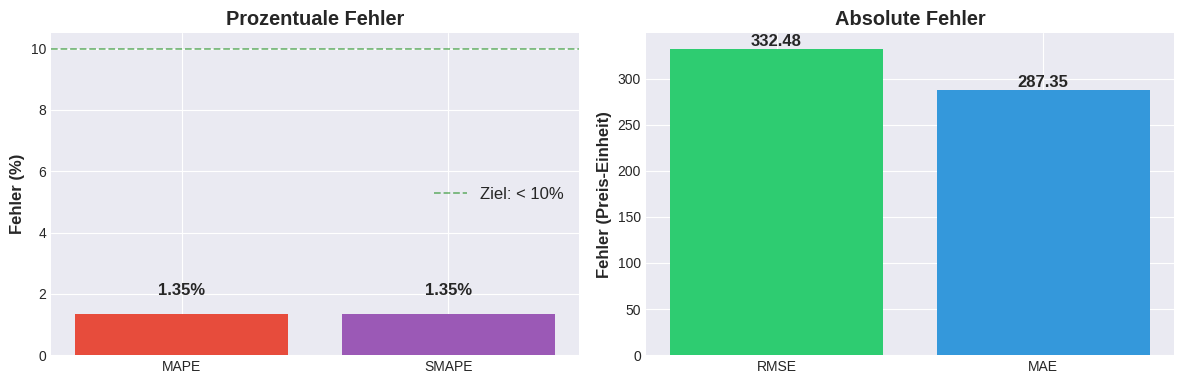

In [11]:
# Plot: Metriken als Balkendiagramm
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Prozent-Metriken
ax1 = axes[0]
pct_metrics = ['MAPE', 'SMAPE']
pct_values = [metrics[m] for m in pct_metrics]
bars1 = ax1.bar(pct_metrics, pct_values, color=[COLORS['forecast'], COLORS['residual']])
ax1.set_title('Prozentuale Fehler', fontweight='bold')
ax1.set_ylabel('Fehler (%)')
ax1.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='Ziel: < 10%')
ax1.legend()
for bar, val in zip(bars1, pct_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{val:.2f}%', 
             ha='center', va='bottom', fontweight='bold')

# Absolute Metriken
ax2 = axes[1]
abs_metrics = ['RMSE', 'MAE']
abs_values = [metrics[m] for m in abs_metrics]
bars2 = ax2.bar(abs_metrics, abs_values, color=[COLORS['train'], COLORS['test']])
ax2.set_title('Absolute Fehler', fontweight='bold')
ax2.set_ylabel('Fehler (Preis-Einheit)')
for bar, val in zip(bars2, abs_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{val:.2f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 5. 📉 Residuen-Analyse


In [12]:
# Residuen berechnen
test_values = test.to_dataframe().iloc[:, 0]
forecast_values = forecast.to_dataframe().iloc[:, 0]
residuals = test_values - forecast_values

print(f"Residuen Statistiken:")
print(f"  Mean:  {residuals.mean():.4f}")
print(f"  Std:   {residuals.std():.4f}")
print(f"  Min:   {residuals.min():.4f}")
print(f"  Max:   {residuals.max():.4f}")


Residuen Statistiken:
  Mean:  185.2457
  Std:   276.9298
  Min:   -1200.7174
  Max:   312.2826


/tmp/ipykernel_50499/1624588484.py:52: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_50499/1624588484.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_50499/1624588484.py:52: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_50499/1624588484.py:52: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s)

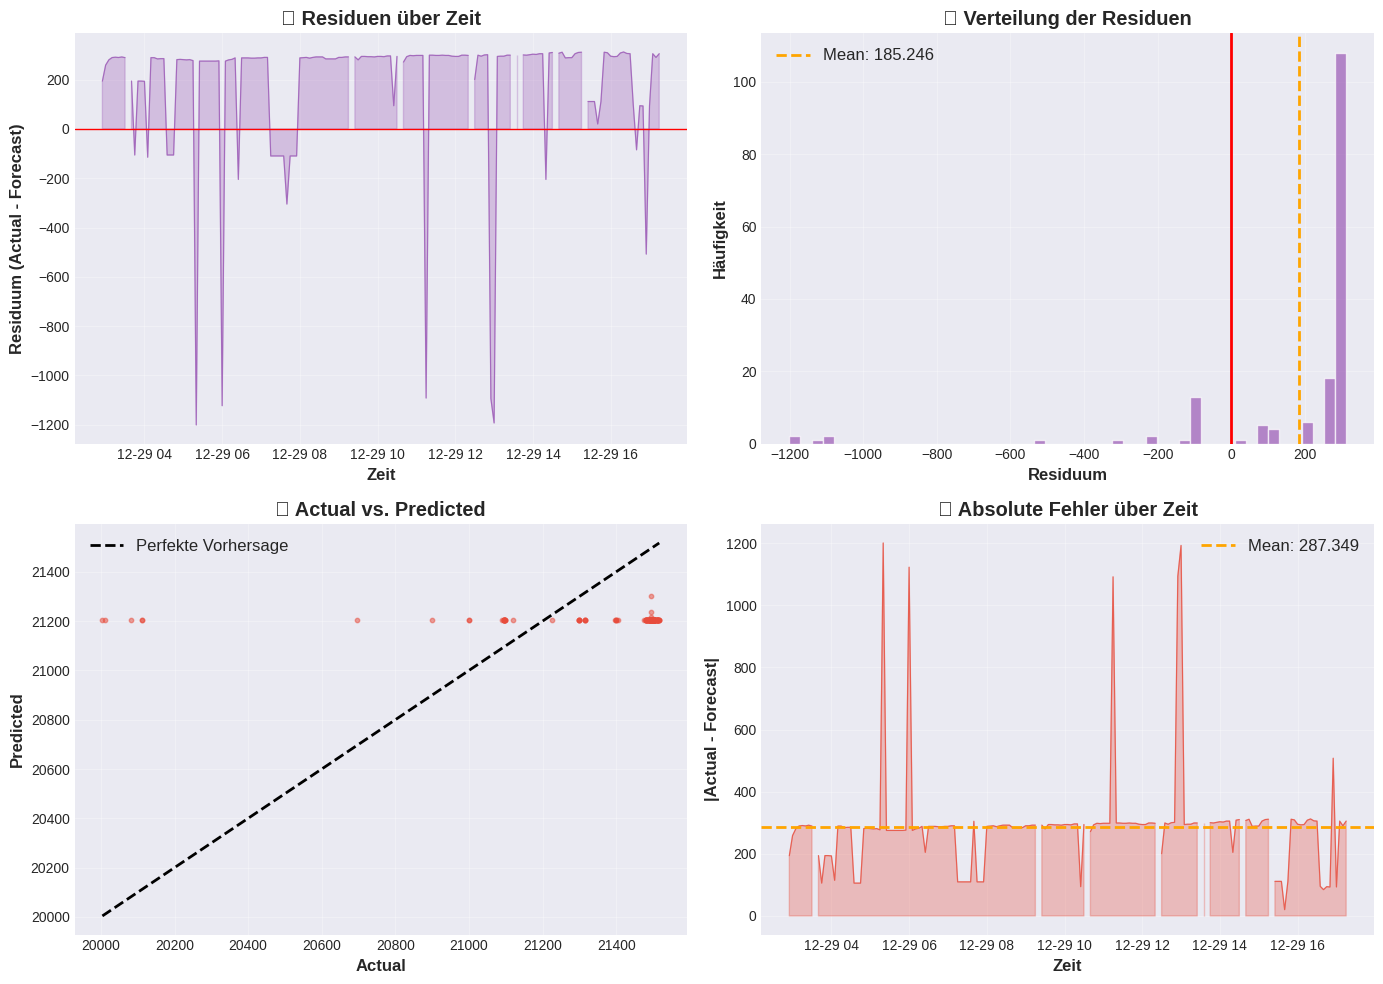

In [13]:
# Plot: Residuen
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuen über Zeit
ax1 = axes[0, 0]
ax1.plot(residuals.index, residuals.values, color=COLORS['residual'], linewidth=0.8, alpha=0.8)
ax1.axhline(y=0, color='red', linestyle='-', linewidth=1)
ax1.fill_between(residuals.index, residuals.values, 0, alpha=0.3, color=COLORS['residual'])
ax1.set_title('📉 Residuen über Zeit', fontweight='bold')
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Residuum (Actual - Forecast)')
ax1.grid(True, alpha=0.3)

# 2. Histogramm der Residuen
ax2 = axes[0, 1]
ax2.hist(residuals, bins=50, color=COLORS['residual'], edgecolor='white', alpha=0.7)
ax2.axvline(x=0, color='red', linestyle='-', linewidth=2)
ax2.axvline(x=residuals.mean(), color='orange', linestyle='--', linewidth=2, label=f'Mean: {residuals.mean():.3f}')
ax2.set_title('📊 Verteilung der Residuen', fontweight='bold')
ax2.set_xlabel('Residuum')
ax2.set_ylabel('Häufigkeit')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Actual vs Predicted Scatter
ax3 = axes[1, 0]
ax3.scatter(test_values.values, forecast_values.values, 
            alpha=0.5, color=COLORS['forecast'], s=10)
# Perfekte Vorhersage Linie
min_val = min(test_values.min(), forecast_values.min())
max_val = max(test_values.max(), forecast_values.max())
ax3.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label='Perfekte Vorhersage')
ax3.set_title('🎯 Actual vs. Predicted', fontweight='bold')
ax3.set_xlabel('Actual')
ax3.set_ylabel('Predicted')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Absolute Fehler über Zeit
ax4 = axes[1, 1]
abs_errors = np.abs(residuals)
ax4.plot(abs_errors.index, abs_errors.values, color=COLORS['forecast'], linewidth=0.8, alpha=0.8)
ax4.axhline(y=abs_errors.mean(), color='orange', linestyle='--', linewidth=2, 
            label=f'Mean: {abs_errors.mean():.3f}')
ax4.fill_between(abs_errors.index, abs_errors.values, 0, alpha=0.3, color=COLORS['forecast'])
ax4.set_title('📏 Absolute Fehler über Zeit', fontweight='bold')
ax4.set_xlabel('Zeit')
ax4.set_ylabel('|Actual - Forecast|')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. 🔄 Modellvergleich: Verschiedene ARIMA Orders


In [14]:
# Verschiedene ARIMA Konfigurationen testen
configs = [
    (1, 1, 0),
    (0, 1, 1),
    (1, 1, 1),
    (2, 1, 1),
    (1, 1, 2),
    (2, 1, 2),
]

results = []
forecasts = {}

print("🔄 Teste verschiedene ARIMA Konfigurationen...\n")

for p, d, q in configs:
    try:
        m = ARIMAModel(p=p, d=d, q=q)
        m.fit(train)
        fc = m.predict(n=len(test))
        
        error = mape(test, fc)
        results.append({
            'order': f'({p},{d},{q})',
            'model': str(m),
            'mape': error,
            'rmse': rmse(test, fc),
            'mae': mae(test, fc)
        })
        forecasts[f'({p},{d},{q})'] = fc
        print(f"  ✅ ARIMA{(p,d,q)}: MAPE = {error:.2f}%")
        
    except Exception as e:
        print(f"  ❌ ARIMA{(p,d,q)}: {e}")

# Als DataFrame
results_df = pd.DataFrame(results).sort_values('mape')
print("\n" + "=" * 50)
print(results_df.to_string(index=False))


🔄 Teste verschiedene ARIMA Konfigurationen...

  ✅ ARIMA(1, 1, 0): MAPE = 0.54%
  ✅ ARIMA(0, 1, 1): MAPE = 1.02%
  ✅ ARIMA(1, 1, 1): MAPE = 1.35%
  ✅ ARIMA(2, 1, 1): MAPE = 1.40%
  ✅ ARIMA(1, 1, 2): MAPE = 1.28%
  ✅ ARIMA(2, 1, 2): MAPE = 1.34%

  order        model     mape       rmse        mae
(1,1,0) ARIMA(1,1,0) 0.541572 295.642741 112.121212
(0,1,1) ARIMA(0,1,1) 1.020516 288.788107 216.035685
(1,1,2) ARIMA(1,1,2) 1.282966 321.721811 272.796273
(2,1,2) ARIMA(2,1,2) 1.340409 330.670423 285.195523
(1,1,1) ARIMA(1,1,1) 1.350369 332.477476 287.348745
(2,1,1) ARIMA(2,1,1) 1.397577 340.584620 297.552381


/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/tmp/ipykernel_50499/689041284.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


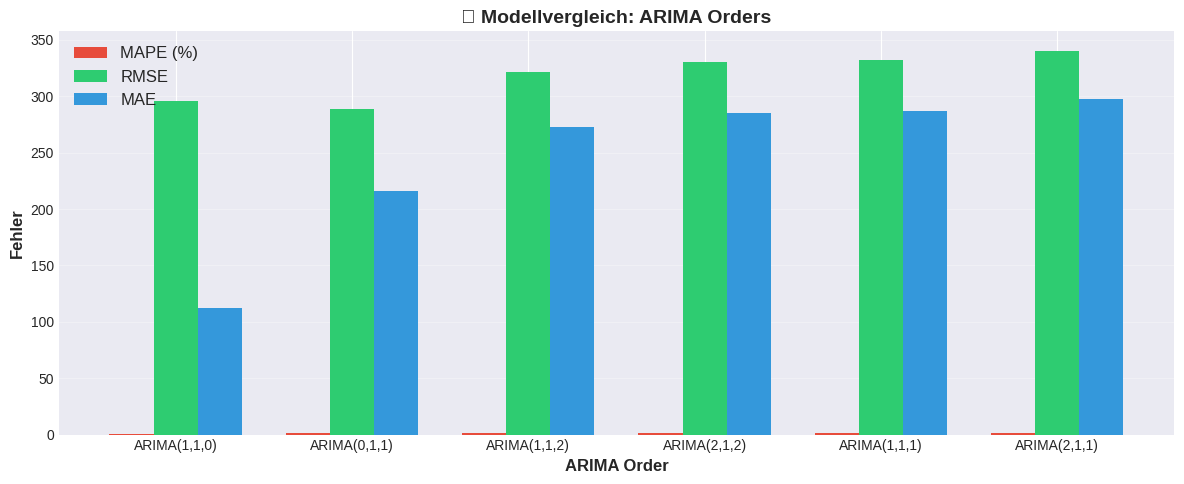

In [15]:
# Plot: Modellvergleich - Metriken
fig, ax = plt.subplots(figsize=(12, 5))

x = np.arange(len(results_df))
width = 0.25

bars1 = ax.bar(x - width, results_df['mape'], width, label='MAPE (%)', color=COLORS['forecast'])
bars2 = ax.bar(x, results_df['rmse'], width, label='RMSE', color=COLORS['train'])
bars3 = ax.bar(x + width, results_df['mae'], width, label='MAE', color=COLORS['test'])

ax.set_title('📊 Modellvergleich: ARIMA Orders', fontsize=14, fontweight='bold')
ax.set_xlabel('ARIMA Order')
ax.set_ylabel('Fehler')
ax.set_xticks(x)
ax.set_xticklabels([f'ARIMA{o}' for o in results_df['order']])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


/tmp/ipykernel_50499/4044127813.py:19: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


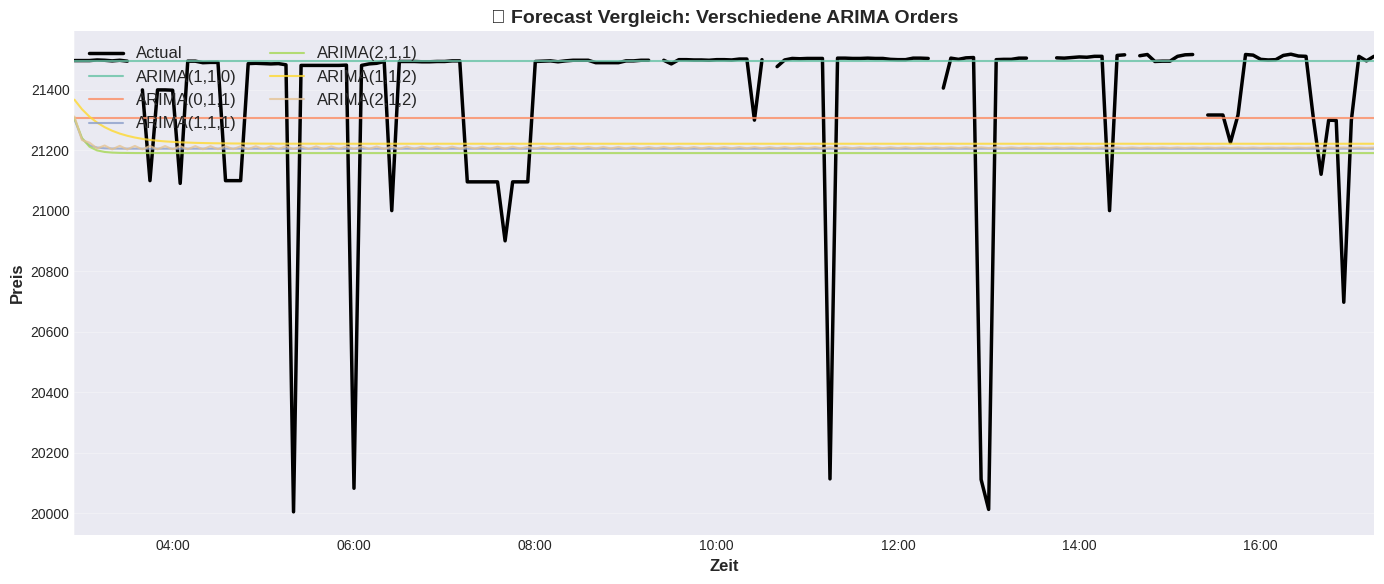

In [17]:
# Plot: Alle Forecasts im Vergleich
fig, ax = plt.subplots(figsize=(14, 6))

# Actual
test.plot(ax=ax, label='Actual', color='black', linewidth=2.5)

# Forecasts
cmap = plt.cm.Set2
for i, (order, fc) in enumerate(forecasts.items()):
    c = cmap(i / len(forecasts))
    fc.plot(ax=ax, label=f'ARIMA{order}', color=c, linewidth=1.5, alpha=0.8)

ax.set_title('🔮 Forecast Vergleich: Verschiedene ARIMA Orders', fontsize=14, fontweight='bold')
ax.set_xlabel('Zeit')
ax.set_ylabel('Preis')
ax.legend(loc='upper left', ncol=2)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 7. 📈 Zusammenfassung


In [18]:
# Bestes Modell
best = results_df.iloc[0]

print("\n" + "=" * 60)
print("📈 ZUSAMMENFASSUNG")
print("=" * 60)
print(f"\n🎯 Item: {data.item_name} (ID: {data.item_id})")
print(f"📅 Zeitraum: {data.start_time.strftime('%Y-%m-%d')} bis {data.end_time.strftime('%Y-%m-%d')}")
print(f"📊 Datenpunkte: {data.num_points} ({data.total_days:.1f} Tage)")
print(f"\n🏆 Bestes Modell: ARIMA{best['order']}")
print(f"   MAPE:  {best['mape']:.2f}%")
print(f"   RMSE:  {best['rmse']:.2f}")
print(f"   MAE:   {best['mae']:.2f}")
print("\n" + "=" * 60)



📈 ZUSAMMENFASSUNG

🎯 Item: Mystic Coin (ID: 19976)
📅 Zeitraum: 2025-12-26 bis 2025-12-29
📊 Datenpunkte: 864 (3.0 Tage)

🏆 Bestes Modell: ARIMA(1,1,0)
   MAPE:  0.54%
   RMSE:  295.64
   MAE:   112.12



/tmp/ipykernel_50499/2896953445.py:37: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/daniel/dev/ai/casml4se-stonkswagen/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


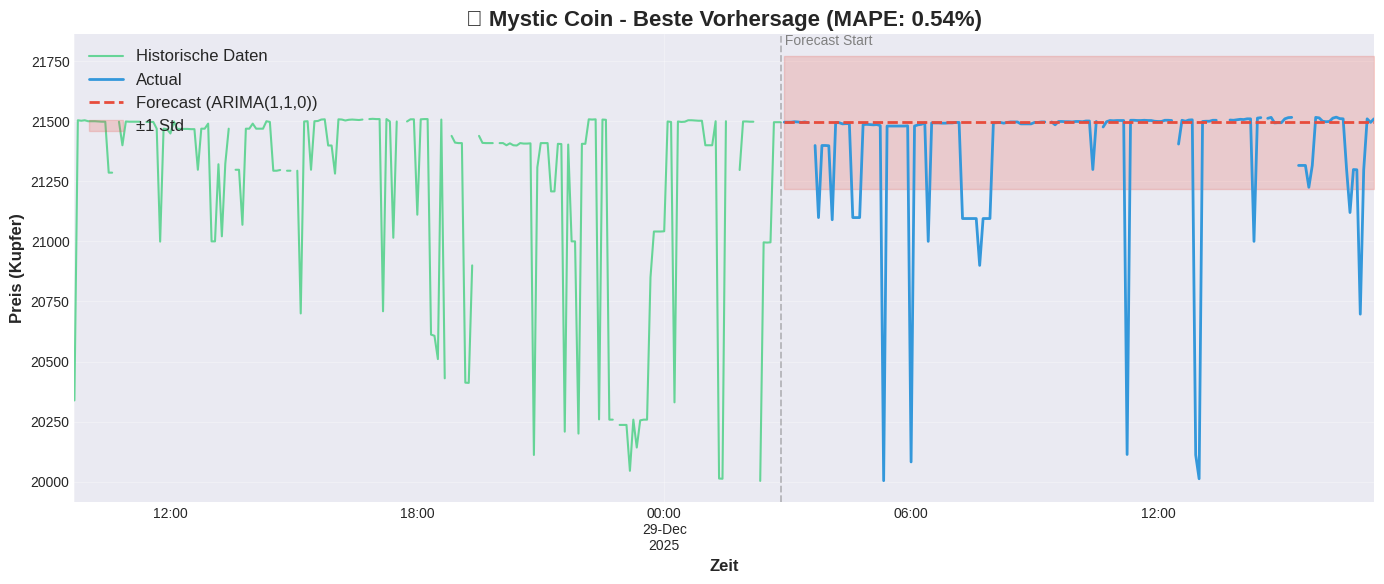

In [19]:
# Finale Visualisierung mit bestem Modell
best_order = best['order']
best_forecast = forecasts[best_order]

fig, ax = plt.subplots(figsize=(14, 6))

# Kontext (letzte 30% von Train)
train_context = train[-int(len(train)*0.3):]
train_context.plot(ax=ax, label='Historische Daten', color=COLORS['train'], linewidth=1.5, alpha=0.7)

# Test und Forecast
test.plot(ax=ax, label='Actual', color=COLORS['test'], linewidth=2)
best_forecast.plot(ax=ax, label=f'Forecast (ARIMA{best_order})', 
                   color=COLORS['forecast'], linewidth=2, linestyle='--')

# Confidence-like Bereich (±1 std der Residuen)
test_vals = test.to_dataframe().iloc[:, 0]
fc_vals = best_forecast.to_dataframe().iloc[:, 0]
best_residuals = test_vals - fc_vals
std = best_residuals.std()
upper = fc_vals + std
lower = fc_vals - std
ax.fill_between(best_forecast.time_index, lower, upper, alpha=0.2, color=COLORS['forecast'], label='±1 Std')

ax.set_title(f'🏆 {data.item_name} - Beste Vorhersage (MAPE: {best["mape"]:.2f}%)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Zeit')
ax.set_ylabel('Preis (Kupfer)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# Annotationen
ax.axvline(x=train.end_time(), color='gray', linestyle='--', alpha=0.5)
ax.text(train.end_time(), ax.get_ylim()[1], ' Forecast Start', 
        ha='left', va='top', fontsize=10, color='gray')

plt.tight_layout()
plt.show()
